In [1]:
import pandas as pd
import networkx as nx


In [2]:
df = pd.read_excel('data.xlsx')
g = nx.from_pandas_edgelist(df,'FromNodeId','ToNodeId')

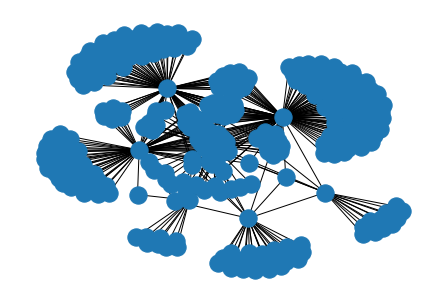

In [3]:
nx.draw(g)

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


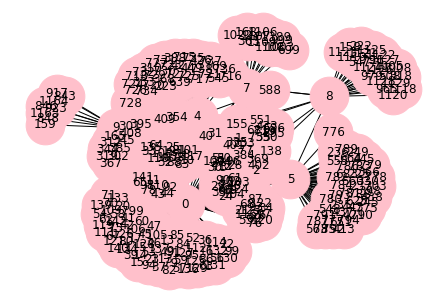

In [4]:
nx.draw(g,with_labels=True,node_color='#FFC0CB',node_size=1500)
print(nx.to_numpy_matrix(g))

<BarContainer object of 10 artists>

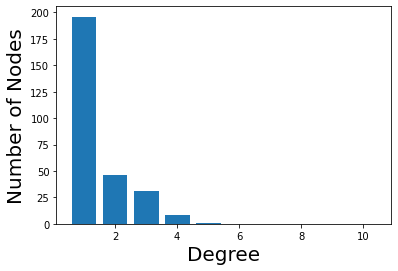

In [5]:
from collections import Counter
import matplotlib.pyplot as plt

degree_sequence = [g.degree(n) for n in g.nodes]
degree_counts = Counter(degree_sequence)

min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())

plt.xlabel("Degree", fontsize=20)
plt.ylabel("Number of Nodes", fontsize=20)
plot_x = list(range(min_degree, 10 + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]
plt.bar(plot_x, plot_y)

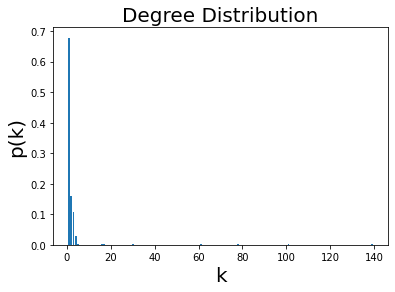

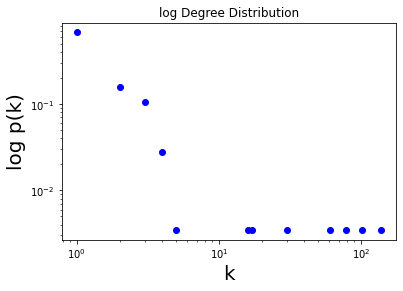

In [6]:
def plot_degree_dist(g):
    
    degrees = g.degree()
    degrees = dict(degrees)
    values = sorted(set(degrees.values()))
    histo = [list(degrees.values()).count(x) for x in values]
    P_k = [x / g.order() for x in histo]
    
    plt.figure()
    plt.bar(values, P_k)
    plt.xlabel("k",fontsize=20)
    plt.ylabel("p(k)", fontsize=20)
    plt.title("Degree Distribution", fontsize=20)
    
    plt.show()
    plt.figure()
    plt.grid(False)
    plt.loglog(values, P_k, "bo")
    plt.xlabel("k", fontsize=20)
    plt.ylabel("log p(k)", fontsize=20)
    plt.title("log Degree Distribution")
    plt.show()
    plt.show()
    
plot_degree_dist(g)

In [7]:
def initial_state(g):
    state = {}
    for node in g.nodes:
        state[node] = 'asleep'
    return state
#print(initial_state(g))

import random

P_AWAKEN = 0.2
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'asleep':
            if random.random() < P_AWAKEN:
                next_state[node] = 'awake'
    return next_state
test_state = initial_state(g)
#print(state_transition(g, test_state))

from simulation import Simulation

sim = Simulation(g, initial_state, state_transition, name='Simple Sim')

In [8]:
print(sim.state())

{0: 'asleep', 4: 'asleep', 5: 'asleep', 7: 'asleep', 8: 'asleep', 9: 'asleep', 10: 'asleep', 11: 'asleep', 12: 'asleep', 13: 'asleep', 14: 'asleep', 15: 'asleep', 16: 'asleep', 17: 'asleep', 18: 'asleep', 19: 'asleep', 20: 'asleep', 21: 'asleep', 22: 'asleep', 23: 'asleep', 24: 'asleep', 25: 'asleep', 26: 'asleep', 27: 'asleep', 28: 'asleep', 29: 'asleep', 30: 'asleep', 31: 'asleep', 32: 'asleep', 33: 'asleep', 34: 'asleep', 35: 'asleep', 36: 'asleep', 37: 'asleep', 38: 'asleep', 39: 'asleep', 40: 'asleep', 41: 'asleep', 42: 'asleep', 43: 'asleep', 44: 'asleep', 45: 'asleep', 46: 'asleep', 47: 'asleep', 48: 'asleep', 49: 'asleep', 50: 'asleep', 51: 'asleep', 52: 'asleep', 53: 'asleep', 54: 'asleep', 55: 'asleep', 56: 'asleep', 57: 'asleep', 58: 'asleep', 59: 'asleep', 60: 'asleep', 61: 'asleep', 62: 'asleep', 63: 'asleep', 64: 'asleep', 65: 'asleep', 66: 'asleep', 67: 'asleep', 68: 'asleep', 69: 'asleep', 70: 'asleep', 71: 'asleep', 72: 'asleep', 73: 'asleep', 74: 'asleep', 75: 'asleep

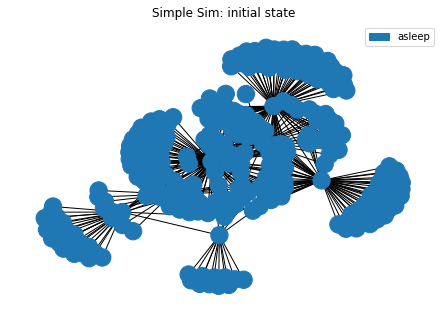

In [9]:
sim.draw()

In [10]:
sim.run()

In [11]:
print(sim.steps)

1


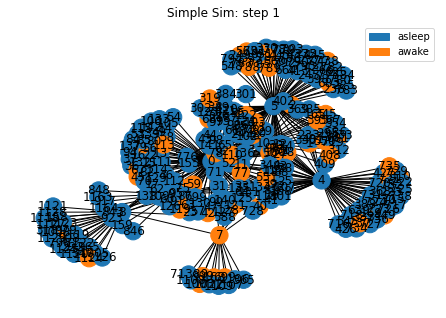

In [12]:
sim.draw(with_labels=True)

In [13]:
print(sim.state())

{0: 'asleep', 4: 'asleep', 5: 'asleep', 7: 'awake', 8: 'asleep', 9: 'asleep', 10: 'asleep', 11: 'asleep', 12: 'asleep', 13: 'asleep', 14: 'asleep', 15: 'asleep', 16: 'asleep', 17: 'asleep', 18: 'asleep', 19: 'awake', 20: 'asleep', 21: 'asleep', 22: 'asleep', 23: 'asleep', 24: 'asleep', 25: 'asleep', 26: 'awake', 27: 'asleep', 28: 'awake', 29: 'asleep', 30: 'asleep', 31: 'asleep', 32: 'asleep', 33: 'asleep', 34: 'awake', 35: 'asleep', 36: 'asleep', 37: 'asleep', 38: 'asleep', 39: 'asleep', 40: 'awake', 41: 'asleep', 42: 'awake', 43: 'asleep', 44: 'asleep', 45: 'awake', 46: 'asleep', 47: 'awake', 48: 'awake', 49: 'asleep', 50: 'awake', 51: 'awake', 52: 'asleep', 53: 'asleep', 54: 'asleep', 55: 'asleep', 56: 'asleep', 57: 'asleep', 58: 'asleep', 59: 'awake', 60: 'asleep', 61: 'asleep', 62: 'asleep', 63: 'asleep', 64: 'asleep', 65: 'asleep', 66: 'asleep', 67: 'awake', 68: 'awake', 69: 'awake', 70: 'asleep', 71: 'asleep', 72: 'awake', 73: 'asleep', 74: 'asleep', 75: 'awake', 76: 'asleep', 7

In [14]:
sim.run(10)

In [15]:
print(sim.steps)

11


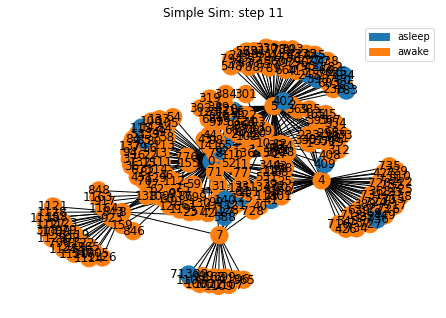

In [16]:
sim.draw(with_labels=True)

<AxesSubplot:title={'center':'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

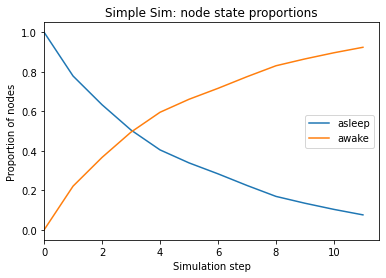

In [17]:
sim.plot() 

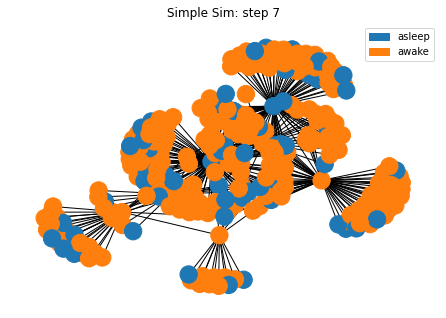

In [18]:
sim.draw(7)

<AxesSubplot:title={'center':'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

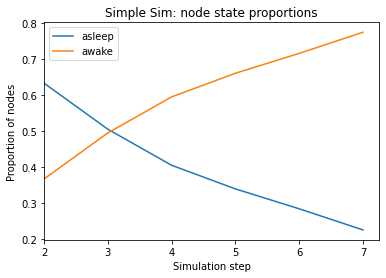

In [19]:
sim.plot(min_step=2, max_step=8)

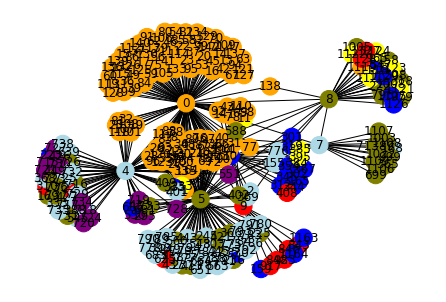

In [20]:
df = pd.read_excel('DataCommunity.xlsx')
node_colors = [item.color for i,item in df.iterrows()]
nx.draw(g, node_color=node_colors, with_labels=True)

In [21]:
groups = {
    'orange': set(),
    'lightblue': set(),
    'olive':set(),
    'red':set(),
    'blue':set(),
    'yellow':set(),
    'purple':set(),
}

for i,item in df.iterrows():
    color = item.color
    n = item.node
    groups[color].add(n)
    
groups

{'orange': {0,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  799},
 'lightblue': {1,
  4,
  169,
  223,
  233,
  295,
  310,
  333,
  335,
  368,
  388,
  401,
  409,
  426,
  427,
  433,
  449,
  545,
  550,


In [22]:
empirical_partition = list(groups.values())
empirical_partition

[{0,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  799},
 {1,
  4,
  169,
  223,
  233,
  295,
  310,
  333,
  335,
  368,
  388,
  401,
  409,
  426,
  427,
  433,
  449,
  545,
  550,
  551,
  588,
  639,
  

In [23]:
nx.community.is_partition(g, empirical_partition)


True

In [24]:
nx.community.quality.modularity(g, empirical_partition)

0.38470254191454845